In [15]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf
import quantstats as qt
from mlfinlab.online_portfolio_selection import *

%matplotlib inline

In [62]:
tickers = ['FB','AMZN','AAPL','NFLX','GOOG']
pesos = [0.2,0.2,0.2,0.2,0.2]

In [63]:
def download_assets(tickers):
    df = yf.download(tickers)
    df = df.dropna()
    prices = df['Adj Close'].dropna(how='all')
    returns = df['Adj Close'].pct_change().dropna(how='all')
    return prices,returns

In [64]:
stock_prices,stock_returns = download_assets(tickers)

[*********************100%***********************]  5 of 5 completed


In [65]:
bah = BAH()

In [66]:
bah.allocate(asset_prices=stock_prices, resample_by='M',weights=pesos, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [67]:
bah.all_weights

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2012-05-31,0.200000,0.200000,0.200000,0.200000,0.200000
2012-06-30,0.200000,0.200000,0.200000,0.200000,0.200000
2012-07-31,0.193936,0.205767,0.201577,0.191593,0.207126
2012-08-31,0.216980,0.224901,0.150536,0.223658,0.183925
2012-09-30,0.228838,0.230750,0.120737,0.233394,0.186282
...,...,...,...,...,...
2020-03-31,0.059145,0.137144,0.100791,0.071750,0.631170
2020-04-30,0.055640,0.143548,0.088334,0.062996,0.649482
2020-05-31,0.055701,0.157827,0.093935,0.063309,0.629228


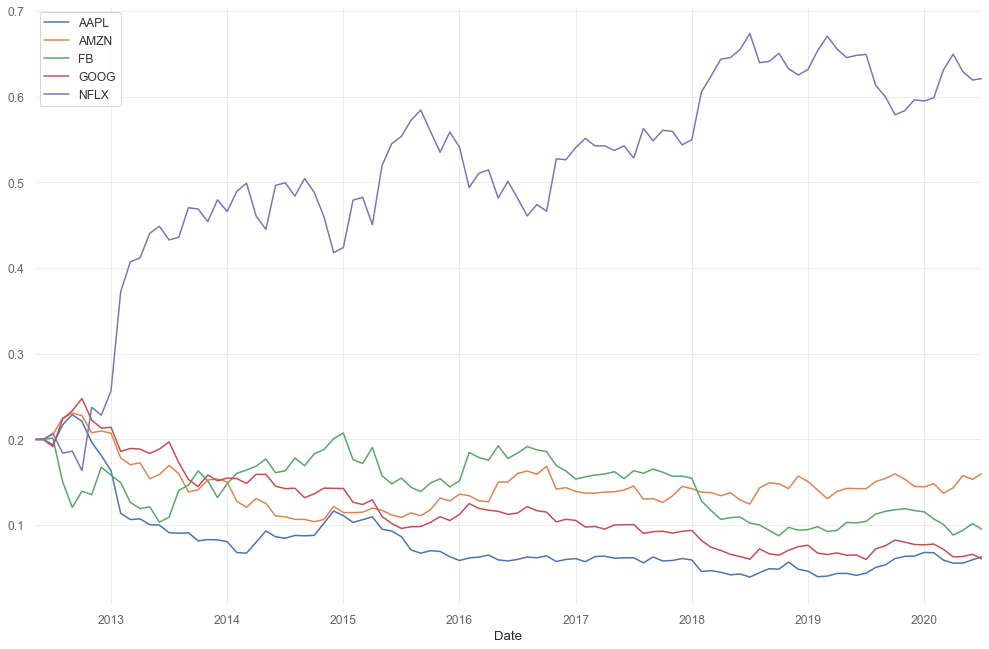

In [68]:
bah.all_weights.plot(kind='line',figsize=(17,11))

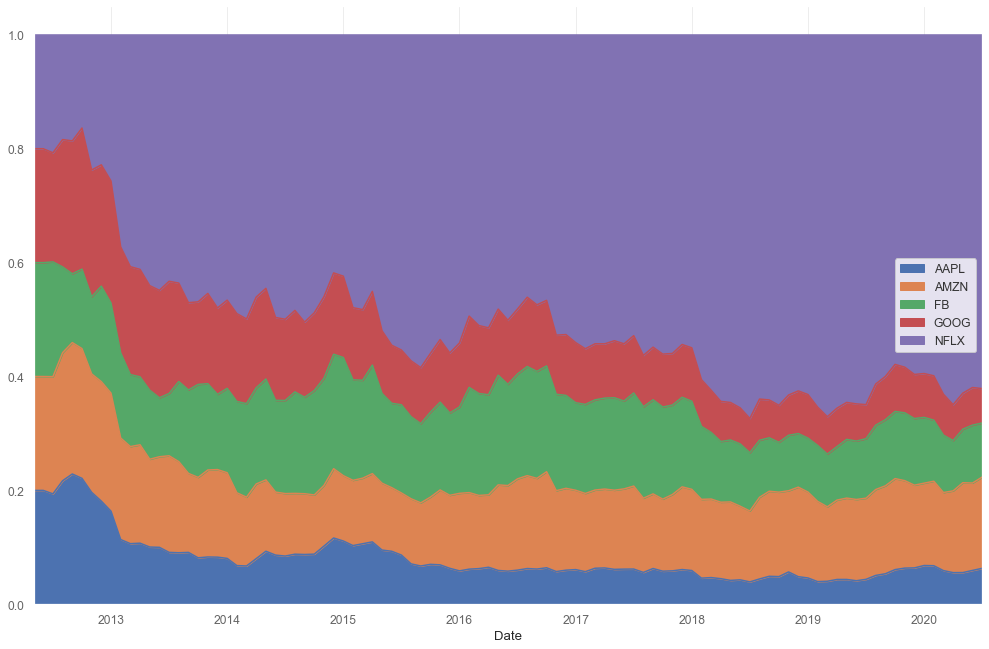

In [69]:
bah.all_weights.plot(kind='area',figsize=(17,11))

In [83]:
returns = bah.portfolio_return * 100
returns = returns['Returns']
spx = yf.download("^GSPC")
spx = spx['Adj Close']

[*********************100%***********************]  1 of 1 completed


                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2012-05-31  2012-05-31
End Period          2020-07-31  2020-07-31
Risk-Free Rate      0.0%        0.0%
Time in Market      99.0%       69.0%

Cumulative Return   1,705.90%   136.60%
CAGR%               42.48%      11.11%
Sharpe              6.54        3.86
Sortino             13.71       5.74
Max Drawdown        -27.07%     -20.0%
Longest DD Days     578         366

Payoff Ratio        1.68        0.65
Profit Factor       2.86        2.28
Common Sense Ratio  5.93        2.72
CPC Index           3.24        1.08
Tail Ratio          2.08        1.19
Outlier Win Ratio   2.13        7.54
Outlier Loss Ratio  2.19        3.09

MTD                 11.71%      0.0%
3M                  41.54%      19.95%
6M                  50.43%      -4.04%
YTD                 50.43%      -4.04%
1Y                  55.36%      4.02%
3Y (ann.)           42.45%      8.55%
5Y (ann.)           36.95%      8

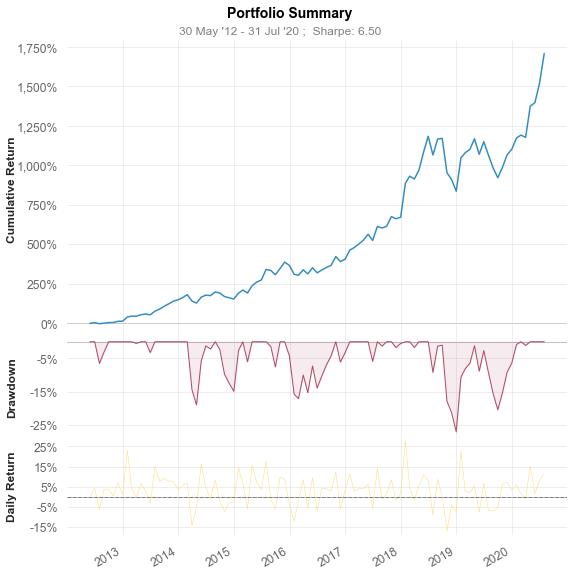

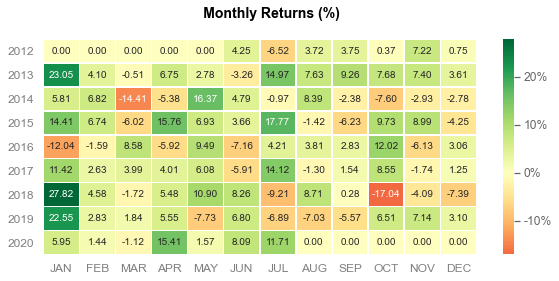

In [85]:
qt.reports.basic(returns,spx)